# **Data preparation and feature creation**

# **Arithmetic operations**

### **Add/Sub/Mul/Div between Columns**

In [1]:
import pandas as pd
import numpy as np

In [2]:
titanic = pd.read_csv('titanic.csv')

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
 8   deck      203 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [4]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN
5,0,3,male,NaN,0,0,8.4583,Q,NaN
6,0,1,male,54.0,0,0,51.8625,S,E
7,0,3,male,2.0,3,1,21.0750,S,NaN
8,1,3,female,27.0,0,2,11.1333,S,NaN
9,1,2,female,14.0,1,0,30.0708,C,NaN


In [5]:
titanic.age.fillna(titanic.age.mean(), inplace = True)

In [6]:
titanic.sibsp + titanic.parch

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Length: 891, dtype: int64

In [7]:
titanic.sibsp.add(titanic.parch)

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Length: 891, dtype: int64

In [8]:
titanic['num_relat'] = titanic.sibsp.add(titanic.parch)

In [9]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,num_relat
0,0,3,male,22.0,1,0,7.2500,S,NaN,1
1,1,1,female,38.0,1,0,71.2833,C,C,1
2,1,3,female,26.0,0,0,7.9250,S,NaN,0
3,1,1,female,35.0,1,0,53.1000,S,C,1
4,0,3,male,35.0,0,0,8.0500,S,NaN,0


In [10]:
sales = pd.read_csv('sales.csv')

In [11]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  4 non-null      object 
 1   Mon         4 non-null      int64  
 2   Tue         4 non-null      int64  
 3   Wed         4 non-null      int64  
 4   Thu         3 non-null      float64
 5   Fri         4 non-null      int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 324.0+ bytes


In [12]:
sales.head()

,Unnamed: 0,Mon,Tue,Wed,Thu,Fri
0,Steven,34,27,15,NaN,33
1,Mike,45,9,74,87.0,12
2,Andi,17,33,54,8.0,29
3,Paul,87,67,27,45.0,7


In [13]:
sales.Mon + sales.Thu

0      NaN
1    132.0
2     25.0
3    132.0
dtype: float64

In [14]:
sales.Mon.add(sales.Thu, fill_value = 0)

0     34.0
1    132.0
2     25.0
3    132.0
dtype: float64

In [15]:
sales['perc_bonus'] = [0.12, 0.15, 0.10, 0.20]

In [16]:
sales.Thu * sales.perc_bonus

0      NaN
1    13.05
2     0.80
3     9.00
dtype: float64

In [17]:
sales.Thu.mul(sales.perc_bonus, fill_value = 0)

0     0.00
1    13.05
2     0.80
3     9.00
dtype: float64

In [18]:
sales.Thu.add(sales.Thu.mul(sales.perc_bonus, fill_value = 0), fill_value = 0)

0      0.00
1    100.05
2      8.80
3     54.00
dtype: float64

In [19]:
sales

,Unnamed: 0,Mon,Tue,Wed,Thu,Fri,perc_bonus
0,Steven,34,27,15,NaN,33,0.12
1,Mike,45,9,74,87.0,12,0.15
2,Andi,17,33,54,8.0,29,0.10
3,Paul,87,67,27,45.0,7,0.20


In [20]:
sales.iloc[:, :-1].sum(axis = 1, numeric_only = True)

0    109.0
1    227.0
2    141.0
3    233.0
dtype: float64

In [21]:
sales['Bonus'] = sales.iloc[:, :-1].sum(axis = 1, numeric_only = True).mul(sales.perc_bonus)

In [22]:
sales

,Unnamed: 0,Mon,Tue,Wed,Thu,Fri,perc_bonus,Bonus
0,Steven,34,27,15,NaN,33,0.12,13.08
1,Mike,45,9,74,87.0,12,0.15,34.05
2,Andi,17,33,54,8.0,29,0.10,14.10
3,Paul,87,67,27,45.0,7,0.20,46.60


### **Add/Sub/Mul/Div between Columns and Scalar**

In [23]:
(1912 - titanic.age).astype('int32').head(20)

0     1890
1     1874
2     1886
3     1877
4     1877
5     1882
6     1858
7     1910
8     1885
9     1898
10    1908
11    1854
12    1892
13    1873
14    1898
15    1857
16    1910
17    1882
18    1881
19    1882
Name: age, dtype: int32

In [24]:
titanic.age.sub(1912, fill_value = 0).mul(-1)

0      1890.000000
1      1874.000000
2      1886.000000
3      1877.000000
4      1877.000000
          ...     
886    1885.000000
887    1893.000000
888    1882.300882
889    1886.000000
890    1880.000000
Name: age, Length: 891, dtype: float64

In [25]:
titanic['YoB'] = titanic.age.sub(1912, fill_value = 0).mul(-1).astype('int32')

In [26]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,num_relat,YoB
0,0,3,male,22.000000,1,0,7.2500,S,NaN,1,1890
1,1,1,female,38.000000,1,0,71.2833,C,C,1,1874
2,1,3,female,26.000000,0,0,7.9250,S,NaN,0,1886
3,1,1,female,35.000000,1,0,53.1000,S,C,1,1877
4,0,3,male,35.000000,0,0,8.0500,S,NaN,0,1877
5,0,3,male,29.699118,0,0,8.4583,Q,NaN,0,1882
6,0,1,male,54.000000,0,0,51.8625,S,E,0,1858
7,0,3,male,2.000000,3,1,21.0750,S,NaN,4,1910
8,1,3,female,27.000000,0,2,11.1333,S,NaN,2,1885
9,1,2,female,14.000000,1,0,30.0708,C,NaN,1,1898


In [27]:
fx_rate = 1.1

In [28]:
titanic['EUR_fare'] = titanic.fare.div(fx_rate)

In [29]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,num_relat,YoB,EUR_fare
0,0,3,male,22.0,1,0,7.2500,S,NaN,1,1890,6.590909
1,1,1,female,38.0,1,0,71.2833,C,C,1,1874,64.803000
2,1,3,female,26.0,0,0,7.9250,S,NaN,0,1886,7.204545
3,1,1,female,35.0,1,0,53.1000,S,C,1,1877,48.272727
4,0,3,male,35.0,0,0,8.0500,S,NaN,0,1877,7.318182


In [30]:
titanic.drop(columns = ['sibsp', 'parch', 'deck', 'YoB', 'EUR_fare'], inplace = True)

In [31]:
titanic.head()

,survived,pclass,sex,age,fare,embarked,num_relat
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


In [32]:
sales.Bonus.round(2)

0    13.08
1    34.05
2    14.10
3    46.60
Name: Bonus, dtype: float64

In [33]:
sales

,Unnamed: 0,Mon,Tue,Wed,Thu,Fri,perc_bonus,Bonus
0,Steven,34,27,15,NaN,33,0.12,13.08
1,Mike,45,9,74,87.0,12,0.15,34.05
2,Andi,17,33,54,8.0,29,0.10,14.10
3,Paul,87,67,27,45.0,7,0.20,46.60


In [34]:
fixed_cost = 5

In [35]:
sales.rename(columns = {'Unnamed: 0': 'Name'}, inplace = True)

In [36]:
sales.set_index('Name', inplace = True)

In [37]:
sales.iloc[:, :-2].sub(fixed_cost, fill_value = 0)

,Mon,Tue,Wed,Thu,Fri
Name,,,,,
Steven,29,22,10,-5.0,28
Mike,40,4,69,82.0,7
Andi,12,28,49,3.0,24
Paul,82,62,22,40.0,2


In [38]:
per_bonus = 0.1

In [39]:
sales.iloc[:, :-2].mul(per_bonus, fill_value = 0)

,Mon,Tue,Wed,Thu,Fri
Name,,,,,
Steven,3.4,2.7,1.5,0.0,3.3
Mike,4.5,0.9,7.4,8.7,1.2
Andi,1.7,3.3,5.4,0.8,2.9
Paul,8.7,6.7,2.7,4.5,0.7


In [40]:
sales

,Mon,Tue,Wed,Thu,Fri,perc_bonus,Bonus
Name,,,,,,,
Steven,34,27,15,NaN,33,0.12,13.08
Mike,45,9,74,87.0,12,0.15,34.05
Andi,17,33,54,8.0,29,0.10,14.10
Paul,87,67,27,45.0,7,0.20,46.60


In [41]:
lot_size = 10
bonus_per_lot = 1.25

In [42]:
sales.iloc[:, :-2].floordiv(lot_size, fill_value = 0).mul(bonus_per_lot).sum(axis = 1)

Name
Steven    11.25
Mike      25.00
Andi      13.75
Paul      25.00
dtype: float64

## **Using map()**

In [43]:
summer = pd.read_csv('summer.csv')

In [44]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [45]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [46]:
sample = summer.sample(n = 7, random_state = 123).sort_values(by = 'Year')

In [47]:
sample

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
4196,1924,Paris,Aquatics,Water polo,"AUSTIN, Arthur",USA,Men,Water Polo,Bronze
11961,1968,Mexico,Athletics,Athletics,"FOSBURY, Richard Douglas",USA,Men,High Jump,Gold
11742,1968,Mexico,Aquatics,Swimming,"WENDEN, Michael Vincent",AUS,Men,200M Freestyle,Gold
13996,1976,Montreal,Aquatics,Swimming,"MAC DONALD, Gary",CAN,Men,4X100M Medley Relay,Silver
16229,1980,Moscow,Rowing,Rowing,"DMITRIENKO, Grigori",URS,Men,Eight With Coxswain (8+),Bronze
19728,1992,Barcelona,Aquatics,Swimming,"KULIKOV, Vladislav",EUN,Men,4X100M Medley Relay,Silver
25901,2004,Athens,Boxing,Boxing,"YELEUOV, Serik",KAZ,Men,57 - 60KG (Lightweight),Bronze


In [48]:
city_country = {
    "Paris":"France",
    "Mexico":"Mexico",
    "Montreal":"Canada",
    "Moscow":"Russia",
    "Barcelona":"Spain",
    "Athens": "Greece"
}

In [49]:
sample['Host_Country'] = sample.City.map(city_country)

In [50]:
sample

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Host_Country
4196,1924,Paris,Aquatics,Water polo,"AUSTIN, Arthur",USA,Men,Water Polo,Bronze,France
11961,1968,Mexico,Athletics,Athletics,"FOSBURY, Richard Douglas",USA,Men,High Jump,Gold,Mexico
11742,1968,Mexico,Aquatics,Swimming,"WENDEN, Michael Vincent",AUS,Men,200M Freestyle,Gold,Mexico
13996,1976,Montreal,Aquatics,Swimming,"MAC DONALD, Gary",CAN,Men,4X100M Medley Relay,Silver,Canada
16229,1980,Moscow,Rowing,Rowing,"DMITRIENKO, Grigori",URS,Men,Eight With Coxswain (8+),Bronze,Russia
19728,1992,Barcelona,Aquatics,Swimming,"KULIKOV, Vladislav",EUN,Men,4X100M Medley Relay,Silver,Spain
25901,2004,Athens,Boxing,Boxing,"YELEUOV, Serik",KAZ,Men,57 - 60KG (Lightweight),Bronze,Greece


In [51]:
titanic.head()

,survived,pclass,sex,age,fare,embarked,num_relat
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


In [52]:
pclass_map = {
    1: 'First',
    2: 'Second',
    3: 'Third'
}

In [53]:
titanic.pclass.map(pclass_map)

0       Third
1       First
2       Third
3       First
4       Third
        ...  
886    Second
887     First
888     Third
889     First
890     Third
Name: pclass, Length: 891, dtype: object

In [54]:
titanic.pclass = titanic.pclass.map(pclass_map)

In [55]:
titanic

,survived,pclass,sex,age,fare,embarked,num_relat
0,0,Third,male,22.000000,7.2500,S,1
1,1,First,female,38.000000,71.2833,C,1
2,1,Third,female,26.000000,7.9250,S,0
3,1,First,female,35.000000,53.1000,S,1
4,0,Third,male,35.000000,8.0500,S,0
...,...,...,...,...,...,...,...
886,0,Second,male,27.000000,13.0000,S,0
887,1,First,female,19.000000,30.0000,S,0
888,0,Third,female,29.699118,23.4500,S,3
889,1,First,male,26.000000,30.0000,C,0


## **Conditional transformations**

In [56]:
titanic.head()

,survived,pclass,sex,age,fare,embarked,num_relat
0,0,Third,male,22.0,7.2500,S,1
1,1,First,female,38.0,71.2833,C,1
2,1,Third,female,26.0,7.9250,S,0
3,1,First,female,35.0,53.1000,S,1
4,0,Third,male,35.0,8.0500,S,0


In [57]:
titanic.num_relat == 0

0      False
1      False
2       True
3      False
4       True
       ...  
886     True
887     True
888    False
889     True
890     True
Name: num_relat, Length: 891, dtype: bool

In [58]:
np.where(titanic.num_relat == 0, 'Yes', 'No')

array(['No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No',
       'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No',
       'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No',
       'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes',
       'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No',
       'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No',
       'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes',
       'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No',

In [59]:
titanic['alone'] = pd.Series(np.where(titanic.num_relat == 0, 'Yes', 'No'))

In [60]:
titanic.head()

,survived,pclass,sex,age,fare,embarked,num_relat,alone
0,0,Third,male,22.0,7.2500,S,1,No
1,1,First,female,38.0,71.2833,C,1,No
2,1,Third,female,26.0,7.9250,S,0,Yes
3,1,First,female,35.0,53.1000,S,1,No
4,0,Third,male,35.0,8.0500,S,0,Yes


In [61]:
# titanic['child'] = pd.Series(np.where(titanic.age < 18, 'Yes', 'No'))

In [62]:
# titanic.head(10)

In [63]:
titanic.insert(loc = 4, column = 'Child', value = pd.Series(np.where(titanic.age < 18, 'Yes', 'No')))

In [64]:
titanic.head(10)

,survived,pclass,sex,age,Child,fare,embarked,num_relat,alone
0,0,Third,male,22.000000,No,7.2500,S,1,No
1,1,First,female,38.000000,No,71.2833,C,1,No
2,1,Third,female,26.000000,No,7.9250,S,0,Yes
3,1,First,female,35.000000,No,53.1000,S,1,No
4,0,Third,male,35.000000,No,8.0500,S,0,Yes
5,0,Third,male,29.699118,No,8.4583,Q,0,Yes
6,0,First,male,54.000000,No,51.8625,S,0,Yes
7,0,Third,male,2.000000,Yes,21.0750,S,4,No
8,1,Third,female,27.000000,No,11.1333,S,2,No
9,1,Second,female,14.000000,Yes,30.0708,C,1,No


## **Discretization and binning with pd.cut()**

In [65]:
titanic.head()

,survived,pclass,sex,age,Child,fare,embarked,num_relat,alone
0,0,Third,male,22.0,No,7.2500,S,1,No
1,1,First,female,38.0,No,71.2833,C,1,No
2,1,Third,female,26.0,No,7.9250,S,0,Yes
3,1,First,female,35.0,No,53.1000,S,1,No
4,0,Third,male,35.0,No,8.0500,S,0,Yes


In [66]:
age_bins = [0, 10, 18, 30, 55, 100]

In [67]:
cats = pd.cut(titanic.age, age_bins, right = False)

In [68]:
cats

0      [18, 30)
1      [30, 55)
2      [18, 30)
3      [30, 55)
4      [30, 55)
         ...   
886    [18, 30)
887    [18, 30)
888    [18, 30)
889    [18, 30)
890    [30, 55)
Name: age, Length: 891, dtype: category
Categories (5, interval[int64, left]): [[0, 10) < [10, 18) < [18, 30) < [30, 55) < [55, 100)]

In [69]:
cats.value_counts()

age
[18, 30)     448
[30, 55)     288
[0, 10)       62
[10, 18)      51
[55, 100)     42
Name: count, dtype: int64

In [70]:
titanic['age_cat'] = cats

In [71]:
titanic.head()

,survived,pclass,sex,age,Child,fare,embarked,num_relat,alone,age_cat
0,0,Third,male,22.0,No,7.2500,S,1,No,"[18, 30)"
1,1,First,female,38.0,No,71.2833,C,1,No,"[30, 55)"
2,1,Third,female,26.0,No,7.9250,S,0,Yes,"[18, 30)"
3,1,First,female,35.0,No,53.1000,S,1,No,"[30, 55)"
4,0,Third,male,35.0,No,8.0500,S,0,Yes,"[30, 55)"


In [72]:
titanic.groupby('age_cat', observed = False).survived.mean()

age_cat
[0, 10)      0.612903
[10, 18)     0.450980
[18, 30)     0.328125
[30, 55)     0.420139
[55, 100)    0.309524
Name: survived, dtype: float64

In [73]:
titanic.groupby('age_cat', observed = True).survived.mean()

age_cat
[0, 10)      0.612903
[10, 18)     0.450980
[18, 30)     0.328125
[30, 55)     0.420139
[55, 100)    0.309524
Name: survived, dtype: float64

In [74]:
cat_names = ['child', 'teen', 'young_adult', 'adult', 'senior']

In [75]:
pd.cut(titanic.age, age_bins, labels = cat_names, right = False)

0      young_adult
1            adult
2      young_adult
3            adult
4            adult
          ...     
886    young_adult
887    young_adult
888    young_adult
889    young_adult
890          adult
Name: age, Length: 891, dtype: category
Categories (5, object): ['child' < 'teen' < 'young_adult' < 'adult' < 'senior']

In [76]:
titanic['age_cat'] = pd.cut(titanic.age, age_bins, labels = cat_names, right = False)

In [77]:
titanic.head(20)

,survived,pclass,sex,age,Child,fare,embarked,num_relat,alone,age_cat
0,0,Third,male,22.000000,No,7.2500,S,1,No,young_adult
1,1,First,female,38.000000,No,71.2833,C,1,No,adult
2,1,Third,female,26.000000,No,7.9250,S,0,Yes,young_adult
3,1,First,female,35.000000,No,53.1000,S,1,No,adult
4,0,Third,male,35.000000,No,8.0500,S,0,Yes,adult
5,0,Third,male,29.699118,No,8.4583,Q,0,Yes,young_adult
6,0,First,male,54.000000,No,51.8625,S,0,Yes,adult
7,0,Third,male,2.000000,Yes,21.0750,S,4,No,child
8,1,Third,female,27.000000,No,11.1333,S,2,No,young_adult
9,1,Second,female,14.000000,Yes,30.0708,C,1,No,teen


In [78]:
titanic.groupby('age_cat', observed = True).survived.mean()

age_cat
child          0.612903
teen           0.450980
young_adult    0.328125
adult          0.420139
senior         0.309524
Name: survived, dtype: float64

In [79]:
titanic.fare

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: fare, Length: 891, dtype: float64

In [80]:
pd.cut(titanic.fare, bins = 5, right = True, precision = 0)

0      (-1.0, 102.0]
1      (-1.0, 102.0]
2      (-1.0, 102.0]
3      (-1.0, 102.0]
4      (-1.0, 102.0]
           ...      
886    (-1.0, 102.0]
887    (-1.0, 102.0]
888    (-1.0, 102.0]
889    (-1.0, 102.0]
890    (-1.0, 102.0]
Name: fare, Length: 891, dtype: category
Categories (5, interval[float64, right]): [(-1.0, 102.0] < (102.0, 205.0] < (205.0, 307.0] < (307.0, 410.0] < (410.0, 512.0]]

In [81]:
titanic['fare_cat'] = pd.cut(x = titanic.fare, bins = 5, precision = 0, right = True)

In [82]:
titanic.head(20)

,survived,pclass,sex,age,Child,fare,embarked,num_relat,alone,age_cat,fare_cat
0,0,Third,male,22.000000,No,7.2500,S,1,No,young_adult,"(-1.0, 102.0]"
1,1,First,female,38.000000,No,71.2833,C,1,No,adult,"(-1.0, 102.0]"
2,1,Third,female,26.000000,No,7.9250,S,0,Yes,young_adult,"(-1.0, 102.0]"
3,1,First,female,35.000000,No,53.1000,S,1,No,adult,"(-1.0, 102.0]"
4,0,Third,male,35.000000,No,8.0500,S,0,Yes,adult,"(-1.0, 102.0]"
5,0,Third,male,29.699118,No,8.4583,Q,0,Yes,young_adult,"(-1.0, 102.0]"
6,0,First,male,54.000000,No,51.8625,S,0,Yes,adult,"(-1.0, 102.0]"
7,0,Third,male,2.000000,Yes,21.0750,S,4,No,child,"(-1.0, 102.0]"
8,1,Third,female,27.000000,No,11.1333,S,2,No,young_adult,"(-1.0, 102.0]"
9,1,Second,female,14.000000,Yes,30.0708,C,1,No,teen,"(-1.0, 102.0]"


In [83]:
titanic.fare_cat.value_counts()

fare_cat
(-1.0, 102.0]     838
(102.0, 205.0]     33
(205.0, 307.0]     17
(410.0, 512.0]      3
(307.0, 410.0]      0
Name: count, dtype: int64

## **Discretization and binning with pd.qcut()**

In [84]:
pd.qcut(x = titanic.fare, q = 5, precision = 0)

0        (-1.0, 8.0]
1      (40.0, 512.0]
2        (8.0, 10.0]
3      (40.0, 512.0]
4        (8.0, 10.0]
           ...      
886     (10.0, 22.0]
887     (22.0, 40.0]
888     (22.0, 40.0]
889     (22.0, 40.0]
890      (-1.0, 8.0]
Name: fare, Length: 891, dtype: category
Categories (5, interval[float64, right]): [(-1.0, 8.0] < (8.0, 10.0] < (10.0, 22.0] < (22.0, 40.0] < (40.0, 512.0]]

In [85]:
titanic['fare_cat2'] = pd.qcut(x = titanic.fare, q = 5, precision = 0)

In [86]:
titanic

,survived,pclass,sex,age,Child,fare,embarked,num_relat,alone,age_cat,fare_cat,fare_cat2
0,0,Third,male,22.000000,No,7.2500,S,1,No,young_adult,"(-1.0, 102.0]","(-1.0, 8.0]"
1,1,First,female,38.000000,No,71.2833,C,1,No,adult,"(-1.0, 102.0]","(40.0, 512.0]"
2,1,Third,female,26.000000,No,7.9250,S,0,Yes,young_adult,"(-1.0, 102.0]","(8.0, 10.0]"
3,1,First,female,35.000000,No,53.1000,S,1,No,adult,"(-1.0, 102.0]","(40.0, 512.0]"
4,0,Third,male,35.000000,No,8.0500,S,0,Yes,adult,"(-1.0, 102.0]","(8.0, 10.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,Second,male,27.000000,No,13.0000,S,0,Yes,young_adult,"(-1.0, 102.0]","(10.0, 22.0]"
887,1,First,female,19.000000,No,30.0000,S,0,Yes,young_adult,"(-1.0, 102.0]","(22.0, 40.0]"
888,0,Third,female,29.699118,No,23.4500,S,3,No,young_adult,"(-1.0, 102.0]","(22.0, 40.0]"
889,1,First,male,26.000000,No,30.0000,C,0,Yes,young_adult,"(-1.0, 102.0]","(22.0, 40.0]"


In [87]:
cat_quant = [0, 0.1, 0.25, 0.50, 0.9, 1]

In [88]:
pd.qcut(x = titanic.fare, q = cat_quant, precision = 0)

0       (-0.1, 7.6]
1      (14.5, 78.0]
2       (7.9, 14.5]
3      (14.5, 78.0]
4       (7.9, 14.5]
           ...     
886     (7.9, 14.5]
887    (14.5, 78.0]
888    (14.5, 78.0]
889    (14.5, 78.0]
890      (7.6, 7.9]
Name: fare, Length: 891, dtype: category
Categories (5, interval[float64, right]): [(-0.1, 7.6] < (7.6, 7.9] < (7.9, 14.5] < (14.5, 78.0] < (78.0, 512.3]]

In [89]:
titanic['fare_cat2'] = pd.qcut(x = titanic.fare, q = cat_quant, precision = 0)

In [90]:
titanic

,survived,pclass,sex,age,Child,fare,embarked,num_relat,alone,age_cat,fare_cat,fare_cat2
0,0,Third,male,22.000000,No,7.2500,S,1,No,young_adult,"(-1.0, 102.0]","(-0.1, 7.6]"
1,1,First,female,38.000000,No,71.2833,C,1,No,adult,"(-1.0, 102.0]","(14.5, 78.0]"
2,1,Third,female,26.000000,No,7.9250,S,0,Yes,young_adult,"(-1.0, 102.0]","(7.9, 14.5]"
3,1,First,female,35.000000,No,53.1000,S,1,No,adult,"(-1.0, 102.0]","(14.5, 78.0]"
4,0,Third,male,35.000000,No,8.0500,S,0,Yes,adult,"(-1.0, 102.0]","(7.9, 14.5]"
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,Second,male,27.000000,No,13.0000,S,0,Yes,young_adult,"(-1.0, 102.0]","(7.9, 14.5]"
887,1,First,female,19.000000,No,30.0000,S,0,Yes,young_adult,"(-1.0, 102.0]","(14.5, 78.0]"
888,0,Third,female,29.699118,No,23.4500,S,3,No,young_adult,"(-1.0, 102.0]","(14.5, 78.0]"
889,1,First,male,26.000000,No,30.0000,C,0,Yes,young_adult,"(-1.0, 102.0]","(14.5, 78.0]"


In [91]:
titanic.fare_cat2.value_counts()

fare_cat2
(14.5, 78.0]     357
(7.9, 14.5]      224
(7.6, 7.9]       131
(-0.1, 7.6]       92
(78.0, 512.3]     87
Name: count, dtype: int64

In [92]:
fare_labels = ['very_cheap', 'cheap', 'moderate', 'expensive', 'very_expensive']

In [93]:
titanic['fare_labels'] = pd.qcut(x = titanic.fare, q = cat_quant, labels = fare_labels, precision = 0)

In [94]:
titanic.head()

,survived,pclass,sex,age,Child,fare,embarked,num_relat,alone,age_cat,fare_cat,fare_cat2,fare_labels
0,0,Third,male,22.0,No,7.2500,S,1,No,young_adult,"(-1.0, 102.0]","(-0.1, 7.6]",very_cheap
1,1,First,female,38.0,No,71.2833,C,1,No,adult,"(-1.0, 102.0]","(14.5, 78.0]",expensive
2,1,Third,female,26.0,No,7.9250,S,0,Yes,young_adult,"(-1.0, 102.0]","(7.9, 14.5]",moderate
3,1,First,female,35.0,No,53.1000,S,1,No,adult,"(-1.0, 102.0]","(14.5, 78.0]",expensive
4,0,Third,male,35.0,No,8.0500,S,0,Yes,adult,"(-1.0, 102.0]","(7.9, 14.5]",moderate


In [95]:
titanic.groupby(['age_cat', 'fare_labels'], observed = True).survived.mean().unstack(fill_value = 0).round(2)

fare_labels,very_cheap,cheap,moderate,expensive,very_expensive
age_cat,,,,,
child,0.00,0.00,0.88,0.57,0.67
teen,0.33,0.50,0.50,0.26,1.00
young_adult,0.18,0.27,0.23,0.45,0.66
adult,0.00,0.05,0.32,0.49,0.81
senior,0.00,0.00,0.25,0.27,0.71


## **Floors and Caps**

In [96]:
import matplotlib.pyplot as plt

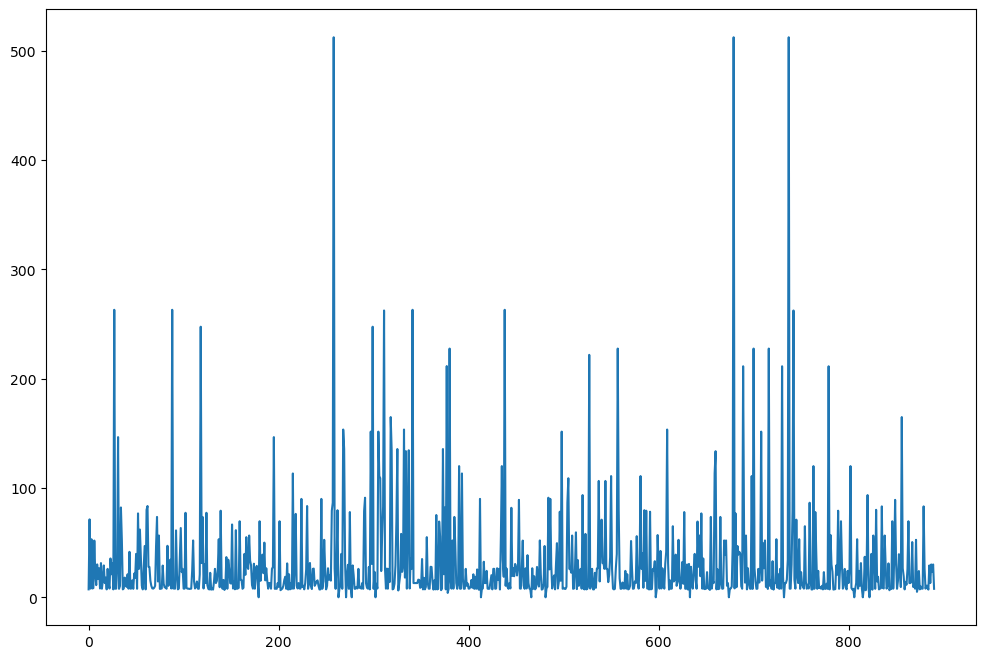

In [97]:
titanic.fare.plot(figsize = (12, 8))
plt.show()

In [98]:
fare_cap = 250

In [99]:
titanic.loc[titanic.fare > fare_cap, 'fare'] = fare_cap

In [100]:
fare_floor = 5

In [101]:
titanic.loc[titanic.fare < fare_floor, 'fare'] = 5

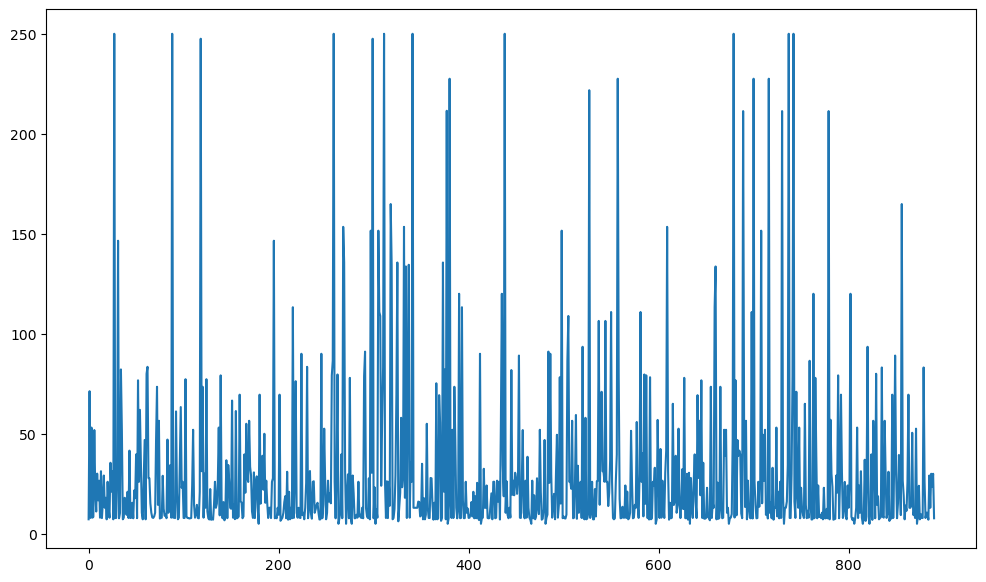

In [102]:
titanic.fare.plot(figsize = (12, 7))
plt.show()

## **Scaling/Standardization**

In [103]:
titanic.head()

,survived,pclass,sex,age,Child,fare,embarked,num_relat,alone,age_cat,fare_cat,fare_cat2,fare_labels
0,0,Third,male,22.0,No,7.2500,S,1,No,young_adult,"(-1.0, 102.0]","(-0.1, 7.6]",very_cheap
1,1,First,female,38.0,No,71.2833,C,1,No,adult,"(-1.0, 102.0]","(14.5, 78.0]",expensive
2,1,Third,female,26.0,No,7.9250,S,0,Yes,young_adult,"(-1.0, 102.0]","(7.9, 14.5]",moderate
3,1,First,female,35.0,No,53.1000,S,1,No,adult,"(-1.0, 102.0]","(14.5, 78.0]",expensive
4,0,Third,male,35.0,No,8.0500,S,0,Yes,adult,"(-1.0, 102.0]","(7.9, 14.5]",moderate


In [104]:
titanic.describe()

,survived,age,fare,num_relat
count,891.000000,891.000000,891.000000,891.000000
mean,0.383838,29.699118,31.320089,0.904602
std,0.486592,13.002015,42.517981,1.613459
min,0.000000,0.420000,5.000000,0.000000
25%,0.000000,22.000000,7.910400,0.000000
50%,0.000000,29.699118,14.454200,0.000000
75%,1.000000,35.000000,31.000000,1.000000
max,1.000000,80.000000,250.000000,10.000000


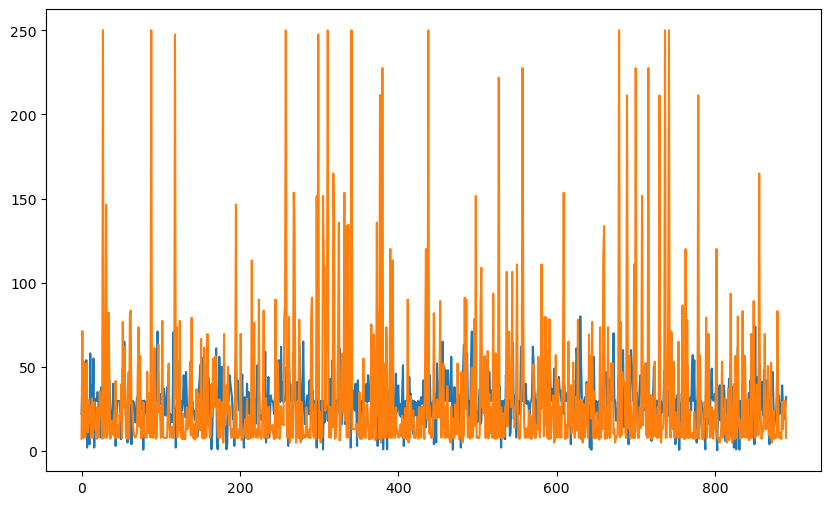

In [105]:
titanic.age.plot(figsize = (10, 6))
titanic.fare.plot(figsize = (10, 6))
plt.show()

In [106]:
desc_stat = titanic.describe()

In [107]:
age_mean = desc_stat.loc['mean', 'age']
fare_mean = desc_stat.loc['mean', 'fare']

In [108]:
age_std = desc_stat.loc['std', 'age']
fare_std = desc_stat.loc['std', 'fare']

In [109]:
titanic['age_z'] = (titanic.age - age_mean) / age_std
titanic['fare_z'] = (titanic.fare - fare_mean) / fare_std

In [110]:
titanic

,survived,pclass,sex,age,Child,fare,embarked,num_relat,alone,age_cat,fare_cat,fare_cat2,fare_labels,age_z,fare_z
0,0,Third,male,22.000000,No,7.2500,S,1,No,young_adult,"(-1.0, 102.0]","(-0.1, 7.6]",very_cheap,-0.592148,-0.566116
1,1,First,female,38.000000,No,71.2833,C,1,No,adult,"(-1.0, 102.0]","(14.5, 78.0]",expensive,0.638430,0.939913
2,1,Third,female,26.000000,No,7.9250,S,0,Yes,young_adult,"(-1.0, 102.0]","(7.9, 14.5]",moderate,-0.284503,-0.550240
3,1,First,female,35.000000,No,53.1000,S,1,No,adult,"(-1.0, 102.0]","(14.5, 78.0]",expensive,0.407697,0.512252
4,0,Third,male,35.000000,No,8.0500,S,0,Yes,adult,"(-1.0, 102.0]","(7.9, 14.5]",moderate,0.407697,-0.547300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,Second,male,27.000000,No,13.0000,S,0,Yes,young_adult,"(-1.0, 102.0]","(7.9, 14.5]",moderate,-0.207592,-0.430879
887,1,First,female,19.000000,No,30.0000,S,0,Yes,young_adult,"(-1.0, 102.0]","(14.5, 78.0]",expensive,-0.822881,-0.031048
888,0,Third,female,29.699118,No,23.4500,S,3,No,young_adult,"(-1.0, 102.0]","(14.5, 78.0]",expensive,0.000000,-0.185100
889,1,First,male,26.000000,No,30.0000,C,0,Yes,young_adult,"(-1.0, 102.0]","(14.5, 78.0]",expensive,-0.284503,-0.031048


In [111]:
titanic.describe()

,survived,age,fare,num_relat,age_z,fare_z
count,891.000000,891.000000,891.000000,891.000000,8.910000e+02,8.910000e+02
mean,0.383838,29.699118,31.320089,0.904602,2.153160e-16,6.579099e-17
std,0.486592,13.002015,42.517981,1.613459,1.000000e+00,1.000000e+00
min,0.000000,0.420000,5.000000,0.000000,-2.251891e+00,-6.190343e-01
25%,0.000000,22.000000,7.910400,0.000000,-5.921480e-01,-5.505833e-01
50%,0.000000,29.699118,14.454200,0.000000,0.000000e+00,-3.966766e-01
75%,1.000000,35.000000,31.000000,1.000000,4.076970e-01,-7.528318e-03
max,1.000000,80.000000,250.000000,10.000000,3.868699e+00,5.143234e+00


In [112]:
round(titanic.describe(), 2)

,survived,age,fare,num_relat,age_z,fare_z
count,891.00,891.00,891.00,891.00,891.00,891.00
mean,0.38,29.70,31.32,0.90,0.00,0.00
std,0.49,13.00,42.52,1.61,1.00,1.00
min,0.00,0.42,5.00,0.00,-2.25,-0.62
25%,0.00,22.00,7.91,0.00,-0.59,-0.55
50%,0.00,29.70,14.45,0.00,0.00,-0.40
75%,1.00,35.00,31.00,1.00,0.41,-0.01
max,1.00,80.00,250.00,10.00,3.87,5.14


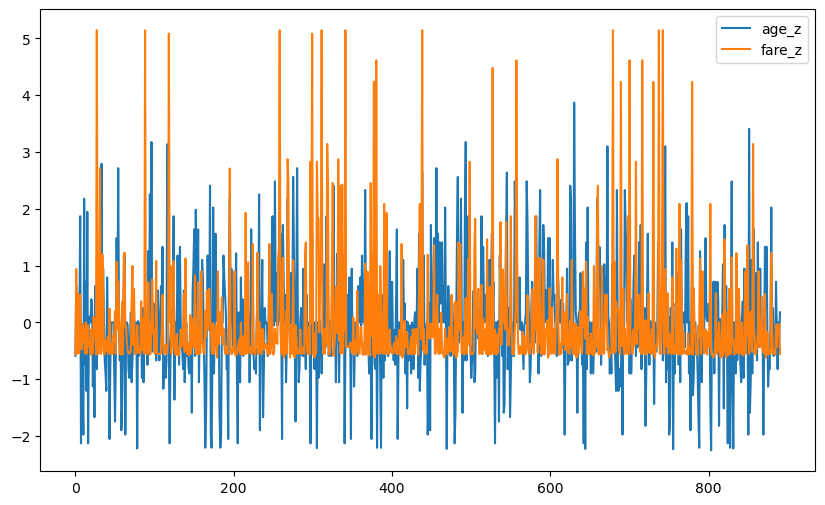

In [113]:
titanic.age_z.plot(figsize = (10, 6))
titanic.fare_z.plot(figsize = (10, 6))
plt.legend()
plt.show()

## **Creating dummy variables**

In [114]:
titanic.head()

,survived,pclass,sex,age,Child,fare,embarked,num_relat,alone,age_cat,fare_cat,fare_cat2,fare_labels,age_z,fare_z
0,0,Third,male,22.0,No,7.2500,S,1,No,young_adult,"(-1.0, 102.0]","(-0.1, 7.6]",very_cheap,-0.592148,-0.566116
1,1,First,female,38.0,No,71.2833,C,1,No,adult,"(-1.0, 102.0]","(14.5, 78.0]",expensive,0.638430,0.939913
2,1,Third,female,26.0,No,7.9250,S,0,Yes,young_adult,"(-1.0, 102.0]","(7.9, 14.5]",moderate,-0.284503,-0.550240
3,1,First,female,35.0,No,53.1000,S,1,No,adult,"(-1.0, 102.0]","(14.5, 78.0]",expensive,0.407697,0.512252
4,0,Third,male,35.0,No,8.0500,S,0,Yes,adult,"(-1.0, 102.0]","(7.9, 14.5]",moderate,0.407697,-0.547300


In [115]:
titanic.drop(
    labels = ['age', 'alone', 'Child', 'age_z', 'fare_z', 'fare_cat', 'fare_cat2', 'fare_labels'],
    axis = 1,
    inplace = True
)

In [116]:
titanic.head()

,survived,pclass,sex,fare,embarked,num_relat,age_cat
0,0,Third,male,7.2500,S,1,young_adult
1,1,First,female,71.2833,C,1,adult
2,1,Third,female,7.9250,S,0,young_adult
3,1,First,female,53.1000,S,1,adult
4,0,Third,male,8.0500,S,0,adult


In [117]:
pd.get_dummies(titanic, columns = ['sex'])

,survived,pclass,fare,embarked,num_relat,age_cat,sex_female,sex_male
0,0,Third,7.2500,S,1,young_adult,False,True
1,1,First,71.2833,C,1,adult,True,False
2,1,Third,7.9250,S,0,young_adult,True,False
3,1,First,53.1000,S,1,adult,True,False
4,0,Third,8.0500,S,0,adult,False,True
...,...,...,...,...,...,...,...,...
886,0,Second,13.0000,S,0,young_adult,False,True
887,1,First,30.0000,S,0,young_adult,True,False
888,0,Third,23.4500,S,3,young_adult,True,False
889,1,First,30.0000,C,0,young_adult,False,True


In [118]:
pd.get_dummies(titanic, columns = ['sex'], dtype = 'int')

,survived,pclass,fare,embarked,num_relat,age_cat,sex_female,sex_male
0,0,Third,7.2500,S,1,young_adult,0,1
1,1,First,71.2833,C,1,adult,1,0
2,1,Third,7.9250,S,0,young_adult,1,0
3,1,First,53.1000,S,1,adult,1,0
4,0,Third,8.0500,S,0,adult,0,1
...,...,...,...,...,...,...,...,...
886,0,Second,13.0000,S,0,young_adult,0,1
887,1,First,30.0000,S,0,young_adult,1,0
888,0,Third,23.4500,S,3,young_adult,1,0
889,1,First,30.0000,C,0,young_adult,0,1


In [119]:
pd.get_dummies(titanic, columns = ['sex', 'pclass'], dtype = 'int')

,survived,fare,embarked,num_relat,age_cat,sex_female,sex_male,pclass_First,pclass_Second,pclass_Third
0,0,7.2500,S,1,young_adult,0,1,0,0,1
1,1,71.2833,C,1,adult,1,0,1,0,0
2,1,7.9250,S,0,young_adult,1,0,0,0,1
3,1,53.1000,S,1,adult,1,0,1,0,0
4,0,8.0500,S,0,adult,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,13.0000,S,0,young_adult,0,1,0,1,0
887,1,30.0000,S,0,young_adult,1,0,1,0,0
888,0,23.4500,S,3,young_adult,1,0,0,0,1
889,1,30.0000,C,0,young_adult,0,1,1,0,0


In [120]:
titanic_d = pd.get_dummies(titanic, columns = ['sex', 'pclass', 'embarked', 'age_cat'], dtype = 'int', drop_first = True)

In [121]:
titanic_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   survived             891 non-null    int64  
 1   fare                 891 non-null    float64
 2   num_relat            891 non-null    int64  
 3   sex_male             891 non-null    int32  
 4   pclass_Second        891 non-null    int32  
 5   pclass_Third         891 non-null    int32  
 6   embarked_Q           891 non-null    int32  
 7   embarked_S           891 non-null    int32  
 8   age_cat_teen         891 non-null    int32  
 9   age_cat_young_adult  891 non-null    int32  
 10  age_cat_adult        891 non-null    int32  
 11  age_cat_senior       891 non-null    int32  
dtypes: float64(1), int32(9), int64(2)
memory usage: 52.3 KB


In [122]:
titanic_d.describe()

,survived,fare,num_relat,sex_male,pclass_Second,pclass_Third,embarked_Q,embarked_S,age_cat_teen,age_cat_young_adult,age_cat_adult,age_cat_senior
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,31.320089,0.904602,0.647587,0.206510,0.551066,0.086420,0.722783,0.057239,0.502806,0.323232,0.047138
std,0.486592,42.517981,1.613459,0.477990,0.405028,0.497665,0.281141,0.447876,0.232429,0.500273,0.467973,0.212053
min,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,14.454200,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,31.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,250.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## **String operations**

In [123]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [124]:
summer.Athlete = summer.Athlete.str.title()

In [125]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"Hajos, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"Herschmann, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"Drivas, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"Malokinis, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"Chasapis, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [126]:
summer.Athlete.str.split(', ', n = 1, expand = True)

,0,1
0,Hajos,Alfred
1,Herschmann,Otto
2,Drivas,Dimitrios
3,Malokinis,Ioannis
4,Chasapis,Spiridon
...,...,...
31160,Janikowski,Damian
31161,Rezaei,Ghasem Gholamreza
31162,Totrov,Rustam
31163,Aleksanyan,Artur


In [127]:
summer[['Surname', 'First_Name']] = summer.Athlete.str.split(', ', n = 1, expand = True)

In [128]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Surname,First_Name
0,1896,Athens,Aquatics,Swimming,"Hajos, Alfred",HUN,Men,100M Freestyle,Gold,Hajos,Alfred
1,1896,Athens,Aquatics,Swimming,"Herschmann, Otto",AUT,Men,100M Freestyle,Silver,Herschmann,Otto
2,1896,Athens,Aquatics,Swimming,"Drivas, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Drivas,Dimitrios
3,1896,Athens,Aquatics,Swimming,"Malokinis, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Malokinis,Ioannis
4,1896,Athens,Aquatics,Swimming,"Chasapis, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Chasapis,Spiridon


In [129]:
summer['Surname'] = summer.Surname.str.strip()

In [130]:
summer['First_Name'] = summer.First_Name.str.strip()

In [131]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Surname,First_Name
0,1896,Athens,Aquatics,Swimming,"Hajos, Alfred",HUN,Men,100M Freestyle,Gold,Hajos,Alfred
1,1896,Athens,Aquatics,Swimming,"Herschmann, Otto",AUT,Men,100M Freestyle,Silver,Herschmann,Otto
2,1896,Athens,Aquatics,Swimming,"Drivas, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Drivas,Dimitrios
3,1896,Athens,Aquatics,Swimming,"Malokinis, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Malokinis,Ioannis
4,1896,Athens,Aquatics,Swimming,"Chasapis, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Chasapis,Spiridon


In [132]:
summer.drop(columns = ['Athlete'], inplace = True)

In [133]:
summer.head()

,Year,City,Sport,Discipline,Country,Gender,Event,Medal,Surname,First_Name
0,1896,Athens,Aquatics,Swimming,HUN,Men,100M Freestyle,Gold,Hajos,Alfred
1,1896,Athens,Aquatics,Swimming,AUT,Men,100M Freestyle,Silver,Herschmann,Otto
2,1896,Athens,Aquatics,Swimming,GRE,Men,100M Freestyle For Sailors,Bronze,Drivas,Dimitrios
3,1896,Athens,Aquatics,Swimming,GRE,Men,100M Freestyle For Sailors,Gold,Malokinis,Ioannis
4,1896,Athens,Aquatics,Swimming,GRE,Men,100M Freestyle For Sailors,Silver,Chasapis,Spiridon
